In [1]:
from pycocotools.coco import COCO

In [2]:
coco = COCO("./train15.json")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [3]:
cats = coco.loadCats(coco.getCatIds())

In [4]:
print([cat["name"] for cat in cats])

['Door']


In [5]:
coco.getCatIds()

[1]

In [6]:
catIds = coco.getCatIds(catNms=["Door"])
imgIds = coco.getImgIds(catIds=catIds );

In [7]:
imgIds

[1]

In [8]:
import numpy as np
imgIds = coco.getImgIds(imgIds = [1])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [9]:
img

{'id': 1,
 'dataset_id': 1,
 'path': 'train15.jpg',
 'width': 512,
 'height': 512,
 'file_name': 'train15.jpg'}

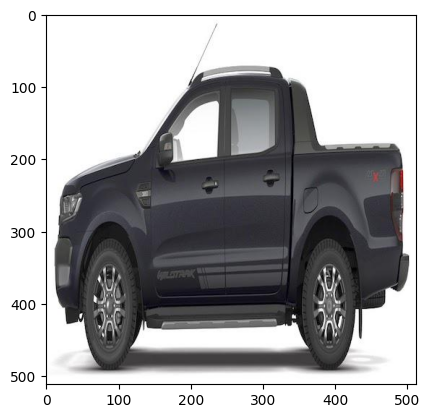

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img_p = mpimg.imread(img['path'])
imgplot = plt.imshow(img_p)
plt.show()

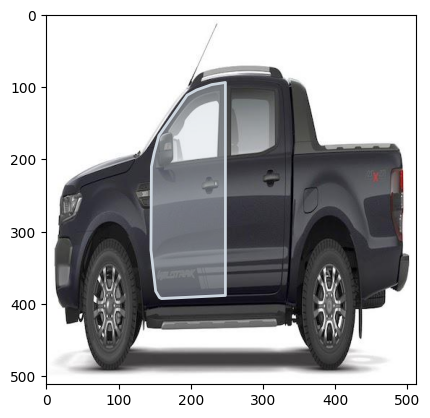

In [11]:
plt.imshow(img_p)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

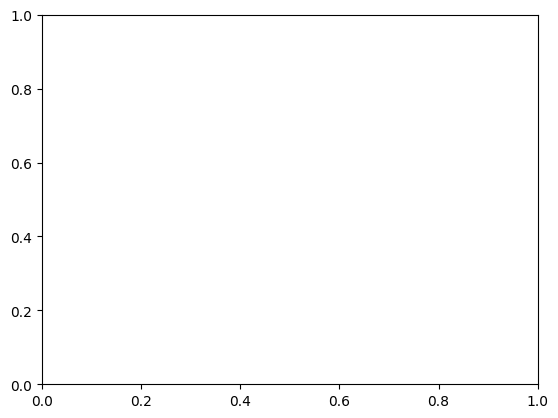

In [12]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [13]:
np.asarray(anns).shape

(1,)

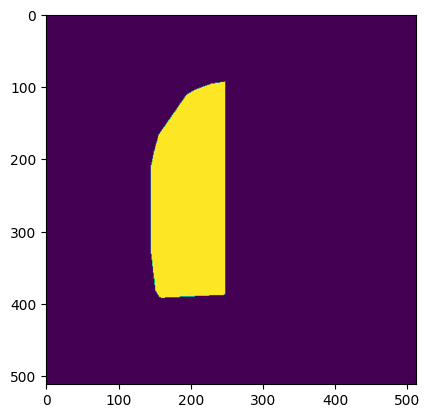

In [14]:
mask = coco.annToMask(anns[0])
plt.imshow(mask)

In [15]:
img_p.shape

(512, 512, 3)

In [16]:
r = img_p[:, :, 0]
g = img_p[:, :, 1]
b = img_p[:, :, 2]

cut_r = r*mask
cut_g = g*mask
cut_b = b*mask

cut = np.dstack((cut_r, cut_g, cut_b))

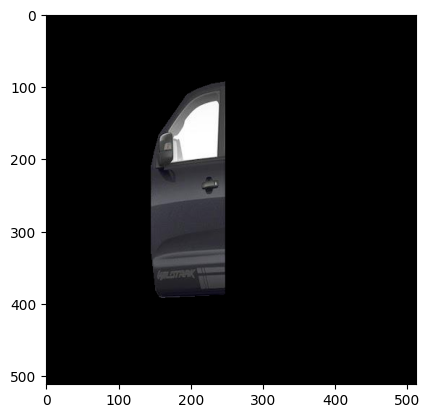

In [17]:
plt.imshow(cut)

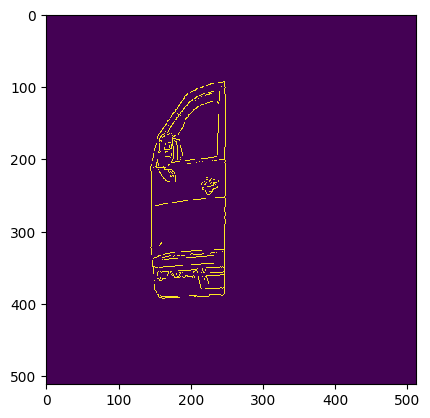

In [18]:
import cv2

img_blur = cv2.GaussianBlur(cut,(3,3), sigmaX=0, sigmaY=0)
edges = cv2.Canny(image=img_blur, threshold1=50, threshold2=50) 
 
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)


edges = (edges == 255).astype(int)

plt.imshow(edges, interpolation='nearest')
plt.show()